# First In First Out (FIFO)

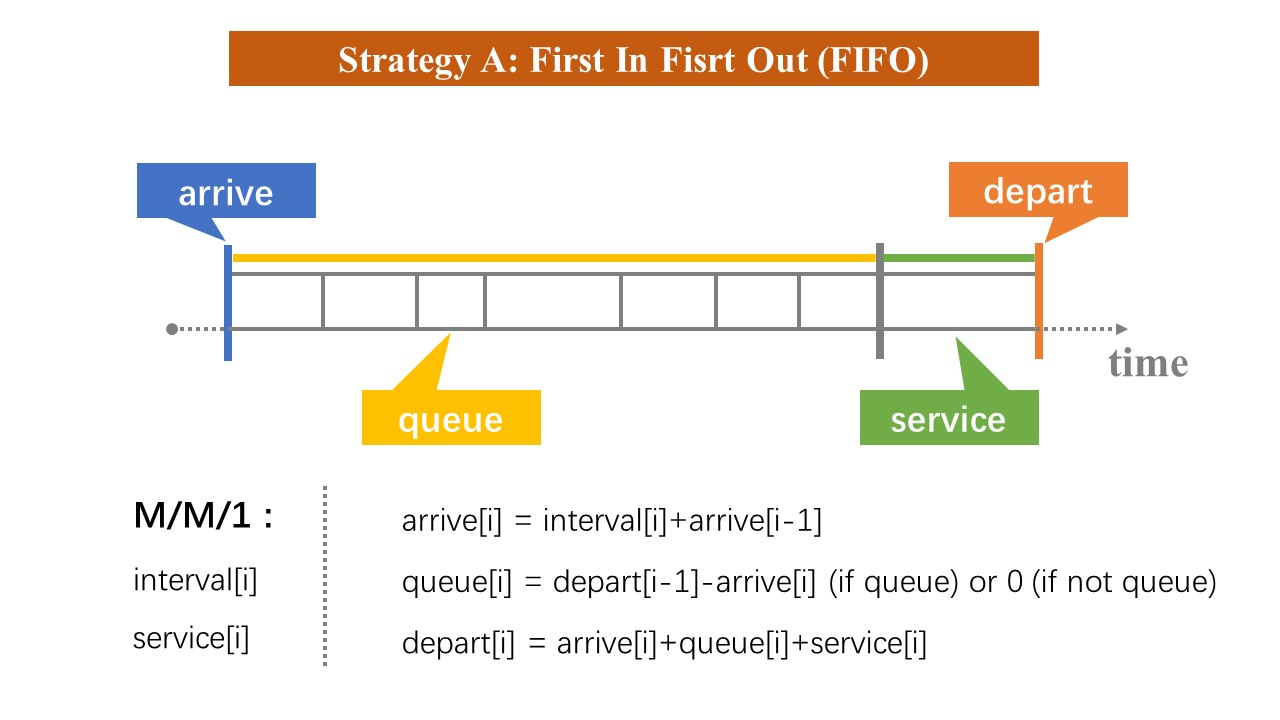

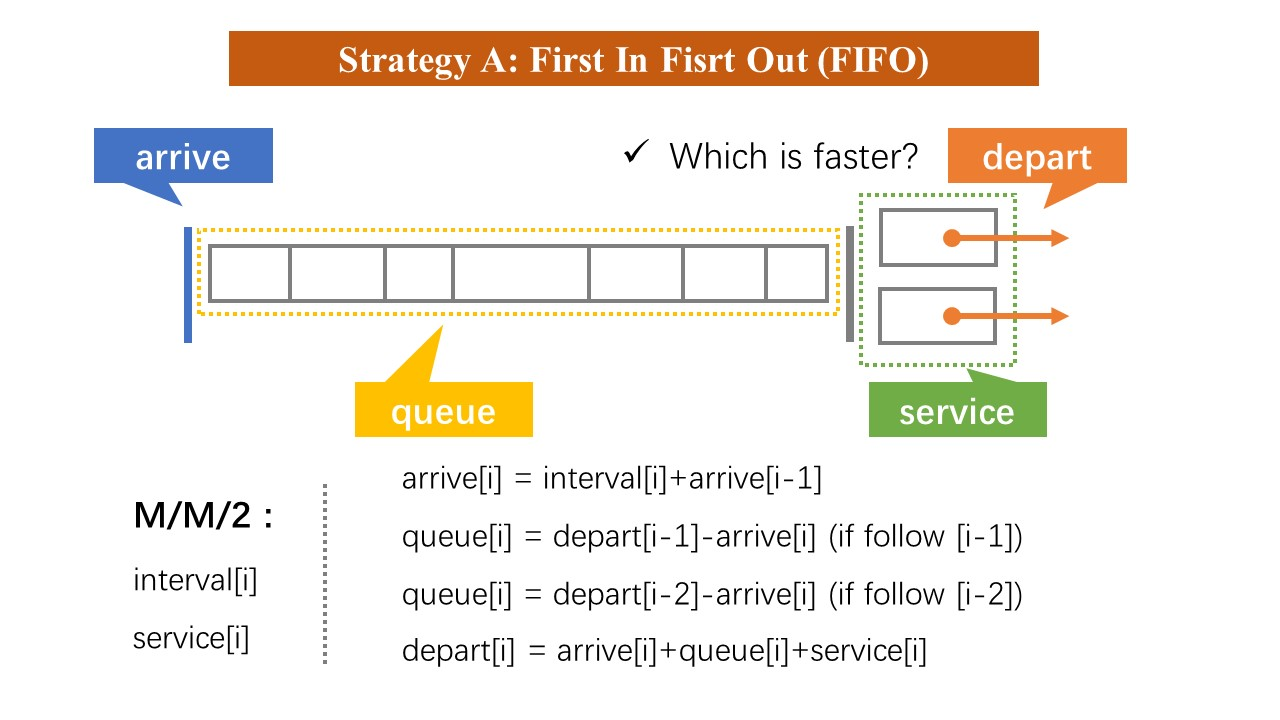

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Dec 5 2022

@author: Ziying Zhou, ID number: 202221250051
"""
# Initialization setting ============================================

import numpy as np
import math

# Function defination ===============================================

def Generate_Interval_Service(N,server):  
      
    ## Interval time 
    interval_mean = 27/60
    interval = np.random.exponential(interval_mean,N)   
    
    ## Service time 
    if server == 1:
        service_mean = 0.9
    else:
        service_mean = 1.8
    service = np.random.exponential(service_mean,N)
    
    return interval,service

def Initialize_Parameters(N):
    
    ## Arrive time
    arrive = [0]*N  
    ## Depart time
    depart = [0]*N  
    ## Queue time
    queue_time = [0]*N 
   
    return arrive,depart,queue_time

def Queueing_MM1(N,interval,service):    
    
    arrive,depart,queue_time = Initialize_Parameters(N)
        
    ## Generate arrive time
    arrive[0] = interval[0]   
    for i in range(1,N):
        arrive[i] = interval[i]+arrive[i-1]   
    
    ## Serve the first costomer
    queue_time[0] = 0
    depart[0] = arrive[0]+service[0] 
        
    ## Serve the rest costomers
    for i in range(1,N):
        if (arrive[i]<depart[i-1]): 
            queue_time[i] = depart[i-1]-arrive[i]         
        depart[i] = arrive[i]+queue_time[i]+service[i]
        
    queue_time_mean = np.mean(queue_time)    
    return queue_time_mean

def Queueing_MM2(N,interval,service):  
    
    arrive,depart,queue_time = Initialize_Parameters(N)
    
    ## Generate arrive time
    arrive[0] = interval[0]
    for i in range(1,N):
        arrive[i] = interval[i]+arrive[i-1]  
    
    ## Serve the first and second costomers
    for i in range(0,2):
        queue_time[i] = 0
        depart[i] = arrive[i]+service[i]   
    
    ## Serve the rest costomers
    for i in range(2,N):    
        if depart[i-2] <= depart[i-1]:
            if arrive[i] <= depart[i-2]:
                queue_time[i] = depart[i-2]-arrive[i]
        else:
            if arrive[i] <= depart[i-1]:
                queue_time[i] = depart[i-1]-arrive[i]
        depart[i] = arrive[i]+queue_time[i]+service[i]    
    
    queue_time_mean = np.mean(queue_time)
    return queue_time_mean

# Queueing simulation ===============================================

if __name__ == "__main__":

    N = 100
    MM1 = []
    MM2 = []
    for j in range(0,1000):
        interval_1,service_1 = Generate_Interval_Service(N,1)
        MM1.append(Queueing_MM1(N,interval_1,service_1))
        interval_2,service_2 = Generate_Interval_Service(N,2)
        MM2.append(Queueing_MM2(N,interval_2,service_2))
    # print("\n# First In First Out "+"#"*70+"\n")
    MM1_mean = np.mean(MM1)
    MM1_std = np.std(MM1,ddof=1)
    MM1_a = MM1_mean-1.96*MM1_std/math.sqrt(len(MM1))
    MM1_b = MM1_mean+1.96*MM1_std/math.sqrt(len(MM1))
    print('The average time in the queue for M/M/1 with a probability of at least 95%::','[%.4f,%.4f]'%(MM1_a,MM1_b))
    MM2_mean = np.mean(MM2)
    MM2_std = np.std(MM2,ddof=1)
    MM2_a = MM2_mean-1.96*MM2_std/math.sqrt(len(MM2))
    MM2_b = MM2_mean+1.96*MM2_std/math.sqrt(len(MM2))
    print('The average time in the queue for M/M/2 with a probability of at least 95%::','[%.4f,%.4f]'%(MM2_a,MM2_b))


# First In First Out ######################################################################

The average time in the queue for M/M/1 with a probability of at least 95%:: [22.2771,22.9444]
The average time in the queue for M/M/2 with a probability of at least 95%:: [8.4611,8.9816]


# Shortest Processing Time (SPT)

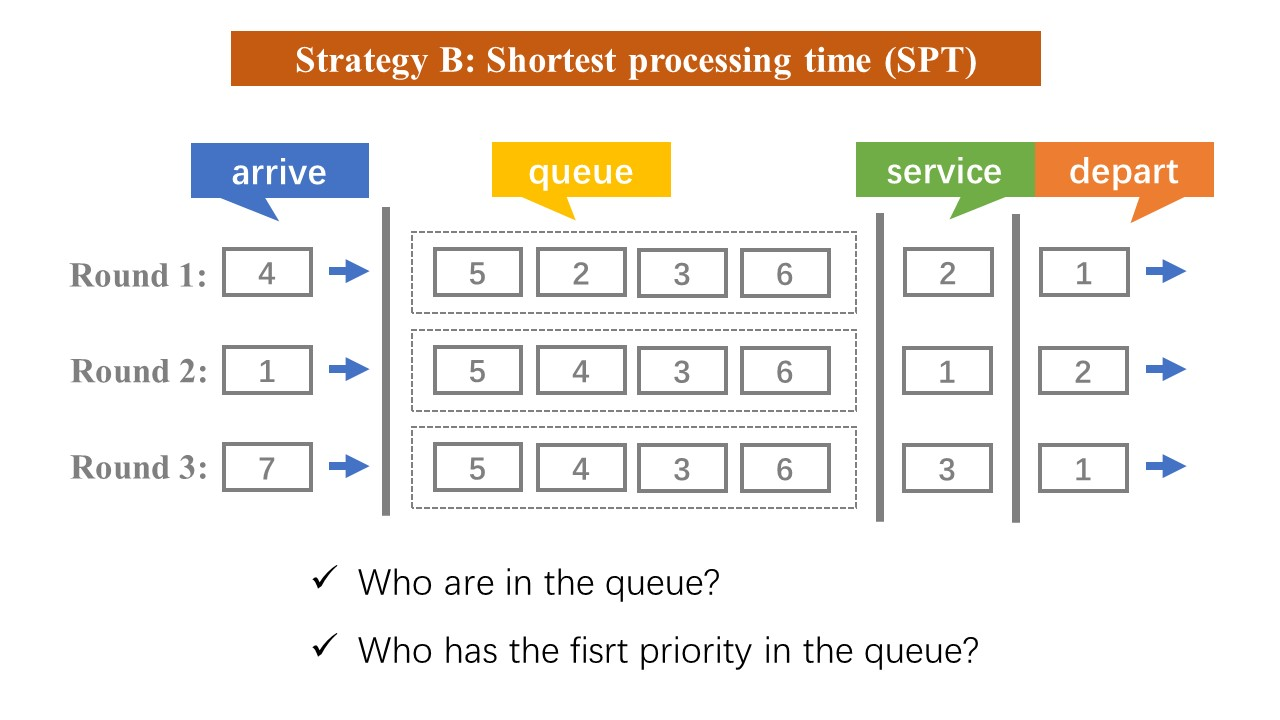

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Mon Dec 5 2022

@author: Ziying Zhou, ID number: 202221250051
"""
# Initialization setting ============================================

import numpy as np
import math

# Function defination ===============================================

def Generate_Interval_Service(N,server):  
      
    ## Interval time 
    interval_mean = 27/60
    interval = np.random.exponential(interval_mean,N)   
    
    ## Service time 
    if server == 1:
        service_mean = 0.9
    else:
        service_mean = 1.8
    service = np.random.exponential(service_mean,N)
    
    return interval,service

def Initialize_Parameters(N):
    
    ## Arrive time
    arrive = [0]*N  
    ## Depart time
    depart = [0]*N  
    ## Queue time
    queue_time = [0]*N 
    ## Weight
    weight = [0]*N
    ## Queue list
    queue_list = [] 
    ## Depart list
    depart_list = []
    
    return arrive,depart,queue_time,weight,queue_list,depart_list

def Print_record(Identifier,n,arrive,queue_time,service,depart,queue_list):
    if Identifier=="Header":
        print("ID\t\tArrive\tQueue\tService\tDepart\tQueueList")
    else:
        print(str(n)+'\t\t'\
                  +str(arrive[n])[0:3]+'\t\t'\
                  +str(queue_time[n])[0:3]+'\t\t'\
                  +str(service[n])[0:3]+'\t\t'\
                  +str(depart[n])[0:3]+'\t\t'\
                  +str(queue_list))
    
def Queueing_MM1_SPT(N,interval,service): 
        
    arrive,depart,queue_time,weight,queue_list,depart_list = Initialize_Parameters(N)
    
    ##  Generate arrive 
    arrive[0] = interval[0]   
    for i in range(1,N):
        arrive[i] = interval[i]+arrive[i-1]   
        
    ## Generate weight
    for i in range(N):
        weight[i] = service[i] 
        
    ## Serve the first customer
    depart[0] = arrive[0]+service[0]
    depart_list = [0]
    weight[0] = 0
    
    # Print_record("Header",0,arrive,queue_time,service,depart,queue_list)
    # Print_record("Body",0,arrive,queue_time,service,depart,queue_list)
    
    for n in range(1,N): 
        
        queue_list = []
        priority = -1
        
        ## Figure out the queue
        for i in range(N):
            if (arrive[i]<=depart_list[-1]) and (weight[i]>0):               
                queue_list.append(i)
        
        if len(queue_list) > 0:
            
            ## Figure out the priority
            priority = queue_list[0]
            for i in queue_list:
                if weight[i] < weight[priority]:
                    priority = i
                    
            if (arrive[i]<depart[depart_list[-1]]): 
                queue_time[priority] = depart[depart_list[-1]]-arrive[priority]
            
            depart[priority] = arrive[priority]+queue_time[priority]+service[priority]
            depart_list.append(priority)
            weight[priority] = 0
            
            # Print_record("Body",priority,arrive,queue_time,service,depart,queue_list)
                                                           
        else:
            
            depart[n] = arrive[n]+queue_time[n]+service[n] 
            depart_list.append(n)
            weight[n] = 0
            
            # Print_record("Body",n,arrive,queue_time,service,depart,queue_list)
  
    queue_time_mean = np.mean(queue_time)
    return queue_time_mean

def Queueing_MM2_SPT(N,interval,service):       
    
    arrive,depart,queue_time,weight,queue_list,depart_list = Initialize_Parameters(N)
  
    ## Generate arrive
    arrive[0] = interval[0]
    for i in range(1,N):
        arrive[i] = interval[i]+arrive[i-1]  
    
    ## Generate weight
    for i in range(N):
        weight[i] = service[i]
    
    ## Serve the first and second customers        
    depart[0] = arrive[0]+service[0]
    depart[1] = arrive[1]+service[1]
    if depart[0]<depart[1]:
        depart_list = [0,1]
    else:
        depart_list = [1,0]
    weight[0] = 0
    weight[1] = 0
    
    # Print_record("Header",0,arrive,queue_time,service,depart,queue_list)
    # Print_record("Body",0,arrive,queue_time,service,depart,queue_list)
    # Print_record("Body",1,arrive,queue_time,service,depart,queue_list)
   
    for n in range(2,N): 
        
        queue_list = []  
        priority = -1  
        
        ## Figure out the queue
        for i in range(N):
            if (arrive[i]<=min(depart[depart_list[-1]],depart[depart_list[-2]])) and (weight[i]>0):
                queue_list.append(i)        
            
        if len(queue_list)>0:
            
            ## Figure out the priority
            priority = queue_list[0]
            for i in queue_list:
                if weight[i] < weight[priority]:
                    priority = i
           
            if depart[depart_list[-1]]<depart[depart_list[-2]]:
                if arrive[priority]<depart[depart_list[-1]]:
                    queue_time[priority] = depart[depart_list[-1]]-arrive[priority]
            else:
                if arrive[priority]<depart[depart_list[-2]]:
                    queue_time[priority] = depart[depart_list[-2]]-arrive[priority]
            
            depart[priority] = arrive[priority]+queue_time[priority]+service[priority]
            weight[priority] = 0 
            queue_list.remove(priority)
            depart_list.append(priority)
            
            # Print_record("Body",priority,arrive,queue_time,service,depart,queue_list)
              
        else:
            
            depart[n] = arrive[n]+queue_time[n]+service[n]
            weight[n] = 0 
            depart_list.append(n)
            
            # Print_record("Body",n,arrive,queue_time,service,depart,queue_list)
           
    queue_time_mean = np.mean(queue_time)
    # print(queue_time_mean)
    return queue_time_mean

# Queueing simulation ===============================================

if __name__ == "__main__":

    N = 100
    MM1 = []
    MM2 = []
    for j in range(0,1000):
        # print("# Test = "+str(j)+" "+"="*50+"\n")
        interval_1,service_1 = Generate_Interval_Service(N,1)
        MM1.append(Queueing_MM1_SPT(N,interval_1,service_1))
        interval_2,service_2 = Generate_Interval_Service(N,2)
        MM2.append(Queueing_MM2_SPT(N,interval_2,service_2))
    print("\n# Shortest Processing Time "+"#"*70+"\n")
    MM1_mean = np.mean(MM1)
    MM1_std = np.std(MM1,ddof=1)
    MM1_a = MM1_mean-1.96*MM1_std/math.sqrt(len(MM1))
    MM1_b = MM1_mean+1.96*MM1_std/math.sqrt(len(MM1))
    print('The average time in the queue for M/M/1 with a probability of at least 95%:','[%.4f,%.4f]'%(MM1_a,MM1_b))
    MM2_mean = np.mean(MM2)
    MM2_std = np.std(MM2,ddof=1)
    MM2_a = MM2_mean-1.96*MM2_std/math.sqrt(len(MM2))
    MM2_b = MM2_mean+1.96*MM2_std/math.sqrt(len(MM2))
    print('The average time in the queue for M/M/2 with a probability of at least 95%:','[%.4f,%.4f]'%(MM2_a,MM2_b))


# Shortest Processing Time ######################################################################

The average time in the queue for M/M/1 with a probability of at least 95%: [18.8841,20.1808]
The average time in the queue for M/M/2 with a probability of at least 95%: [6.4636,6.7445]
